In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import read_csv

# set the path to the data files
path1 = 'OECD_GDP.csv'
path2 = 'OECD_Trade.csv'

# read the data files into pandas dataframes
gdp = read_csv(path1)
trade = read_csv(path2)



### Cleaning GDP Dataframe

In [2]:
gdp.head()

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,1.299463e+06,NaN,NaN
1,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2011,2011,USD,US Dollar,6,Millions,NaN,NaN,1.546689e+06,NaN,NaN
2,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2012,2012,USD,US Dollar,6,Millions,NaN,NaN,1.590708e+06,NaN,NaN
3,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2013,2013,USD,US Dollar,6,Millions,NaN,NaN,1.543216e+06,NaN,NaN
4,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2014,2014,USD,US Dollar,6,Millions,NaN,NaN,1.464256e+06,NaN,NaN


In [3]:
gdp.columns

Index(['LOCATION', 'Country', 'TRANSACT', 'Transaction', 'MEASURE', 'Measure',
       'TIME', 'Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [4]:
# Drop unnecessary columns from the gdp dataframe
gdp = gdp.drop(columns=['TRANSACT', 'Transaction', 'MEASURE', 'Measure', 'Year', 'Unit Code', 'Unit', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

In [5]:
# Multiply the GDP values by 1,000,000 to convert to real GDP values
gdp['Value'] = gdp['Value']*1000000

In [6]:
# Drop PowerCode Code and PowerCode columns from the GDP dataframe
gdp = gdp.drop(columns=['PowerCode Code', 'PowerCode'])

In [7]:
# Rename remaining columns in the GDP dataframe to more meaningful names
gdp.columns = ['CountryCode', 'Country', 'Year', 'GDP']

In [8]:
# Drop European Union from the GDP dataframe to avoid double counting
gdp = gdp[gdp['Country'] != 'European Union (28 countries)']

### Cleaning TRADE Dataframe

In [9]:
trade.head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,0,Units,NaN,NaN,54730242,NaN,NaN


In [10]:
trade.columns

Index(['LOCATION', 'Reporter country', 'FLOW', 'Flow', 'PARTNER',
       'Partner country', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [11]:
# Drop unnecessary columns from the trade Dataframe
trade = trade.drop(columns=['Flow', 'FREQUENCY', 'Frequency', 'TIME', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

In [12]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LOCATION          29222 non-null  object
 1   Reporter country  29222 non-null  object
 2   FLOW              29222 non-null  object
 3   PARTNER           29222 non-null  object
 4   Partner country   29222 non-null  object
 5   Time              29222 non-null  int64 
 6   Value             29222 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


In [13]:
trade['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'SVN', 'LTU', 'LVA',
       'EU28'], dtype=object)

In [14]:
# Drop European Union from the trade dataframe to avoid double counting
trade = trade[trade['LOCATION'] != 'EU28']

In [15]:
# Renaming the columns in the trade dataframe to more meaningful names
trade.columns = ['CountryCode', 'Country', 'TradeType', 'PartnerCountryCode', 'PartnerCountry', 'Year', 'TradeValue']

In [16]:
trade['PartnerCountry'].unique()

array(['Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Argentina', 'Brazil', 'Chile',
       "China (People's Republic of)", 'Estonia', 'India', 'Indonesia',
       'Israel', 'Russia', 'Saudi Arabia', 'Slovenia', 'South Africa',
       'Australia', 'OECD - Total', 'G20', 'Latvia', 'Lithuania',
       'Costa Rica', 'Colombia'], dtype=object)

In [17]:
# Remove 'OECD - Total' row and 'G20' row from the trade dataframe to avoid double counting
trade = trade[trade['PartnerCountry'] != 'OECD - Total']
trade = trade[trade['PartnerCountry'] != 'G20']

In [18]:
trade.head()

,CountryCode,Country,TradeType,PartnerCountryCode,PartnerCountry,Year,TradeValue
0,AUS,Australia,EXP,AUT,Austria,2011,73144918
1,AUS,Australia,EXP,AUT,Austria,2012,71483059
2,AUS,Australia,EXP,AUT,Austria,2013,67897422
3,AUS,Australia,EXP,AUT,Austria,2014,61114752
4,AUS,Australia,EXP,AUT,Austria,2015,54730242


## Task 5: Canadian Export Partner Analysis

In [19]:
# Filter for Canada's export data
canada_exports = trade[(trade['Country'] == 'Canada') & (trade['TradeType'] == 'EXP')].reset_index(drop=True)

In [20]:
# Aggregate total exports by partner country across all years
total_exports = canada_exports.groupby('PartnerCountry')['TradeValue'].sum().reset_index()

# Sort the total exports in descending order to get the top 10 export partners
top10_exports = total_exports.sort_values('TradeValue', ascending=False).head(10).reset_index(drop=True)
top10_exports

,PartnerCountry,TradeValue
0,United States,2954853365434
1,China (People's Republic of),161732469853
2,United Kingdom,129051058180
3,Japan,85993761339
4,Mexico,51308771770
5,Korea,35003976970
6,Netherlands,30580138613
7,Germany,30400474236
8,India,25667456968
9,France,25081556454


In [21]:
# Filter for fixed top 10 export partners
filtered_top_10 = canada_exports[canada_exports['PartnerCountry'].isin(top10_exports['PartnerCountry'])]

In [22]:
# Rank export partners by year
filtered_top_10 = filtered_top_10.copy()
filtered_top_10['Rank'] = filtered_top_10.groupby('Year')['TradeValue'].rank(ascending=False).astype(int)

In [23]:
# Pivot the data to get the top 10 export partners by year
pivot_top_10 = filtered_top_10.pivot(index='Year', columns='PartnerCountry', values='Rank')

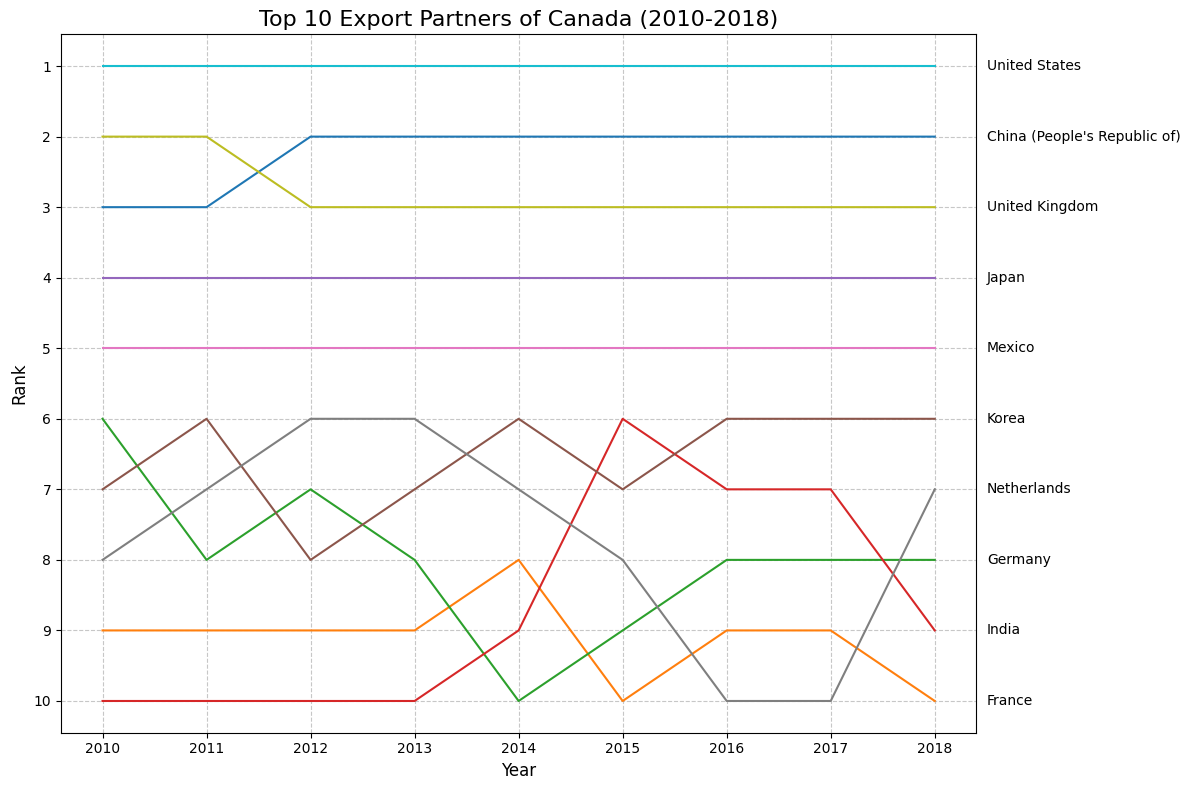

In [24]:
# Plot the line chart
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot each country's rank trend
for country in pivot_top_10.columns:
    plt.plot(pivot_top_10.index, pivot_top_10[country], label=country)
    # Add annotation at the last year
    last_year = pivot_top_10.index[-1]
    last_rank = pivot_top_10[country].iloc[-1]
    plt.text(last_year + 0.5, last_rank, country, verticalalignment='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to make rank 1 appear at the top

# Add title and axis labels
plt.title("Top 10 Export Partners of Canada (2010-2018)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rank", fontsize=12)

# Set custom y-axis ticks to increment by 1
plt.yticks(np.arange(1, 11, 1))  # Range from 1 to 10 with step 1

# Adjust layout to prevent text cut-off
plt.subplots_adjust(right=0.85)  # Increase the right margin

# Add grid
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Identify Japan's Rank

In [25]:
# Filter for Japan's rank
japan_rank = filtered_top_10[filtered_top_10['PartnerCountry'] == 'Japan'].reset_index(drop=True)

# Dislpay Japan's rank by year
japan_rank[['Year', 'Rank']]

,Year,Rank
0,2010,4
1,2011,4
2,2012,4
3,2013,4
4,2014,4
5,2015,4
6,2016,4
7,2017,4
8,2018,4


### Determine when China Overtakes the UK

In [26]:
# Filter for China and UK data
china_uk = filtered_top_10[filtered_top_10['PartnerCountry'].isin(['China (People\'s Republic of)', 'United Kingdom'])]

# Pivot the data to get the exports of China and UK by year
pivot_china_uk = china_uk.pivot(index='Year', columns='PartnerCountry', values='TradeValue')
pivot_china_uk

PartnerCountry,China (People's Republic of),United Kingdom
Year,,
2010,12861932302,15303925783
2011,16922234642,17599103521
2012,22440884541,16839187311
2013,19802180609,13092389068
2014,17472788454,13760764330
2015,16967593508,13308016260
2016,15827259404,12912053554
2017,18195008186,13637261151
2018,21242588207,12598357202


In [27]:
# Determine the yaer when China overtakes the UK in Canada's exports
pivot_china_uk['ChinaOvertake'] = pivot_china_uk['China (People\'s Republic of)'] > pivot_china_uk['United Kingdom']
china_overtake_year = pivot_china_uk[pivot_china_uk['ChinaOvertake']].index.min()

print(f"China overtakes the UK in Canada's exports in {china_overtake_year}")

China overtakes the UK in Canada's exports in 2012
